Homework 9

CS 4375 Machine Learning with Dr. Mazidi

Author: Garrett Strealy

**1. Read the data**

In [1]:
import pandas as pd

df = pd.read_csv('data/bank-full.csv')


**2. Some data exploration with code**

In [2]:
print('Data frame shape:', df.shape)


Data frame shape: (45211, 17)


In [3]:
# print head and tail
df.iloc[:, df.columns != 'y'].head(-20)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45186,59,unknown,married,unknown,no,1500,no,no,cellular,16,nov,280,1,104,2,failure
45187,32,services,single,secondary,no,1168,yes,no,cellular,16,nov,411,1,-1,0,unknown
45188,29,management,single,secondary,no,703,yes,no,cellular,16,nov,236,1,550,2,success
45189,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure


In [4]:
print("Data types:")
print(df.dtypes)


Data types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [5]:
df.describe(include='all')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


**3. Data cleaning**

In [6]:
# one-hot encode the categorical predictors using pandas
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default',
                                 'housing', 'loan', 'contact', 'month', 'poutcome'])

# set the target to a numeric category
df['y'] = df.y.astype('category').cat.codes


**4. More data exploration**

In [7]:
# print new head and tail
df.iloc[:, df.columns != 'y'].head(-20)


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45186,59,1500,16,280,1,104,2,0,0,0,...,0,0,0,1,0,0,1,0,0,0
45187,32,1168,16,411,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45188,29,703,16,236,1,550,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45189,25,199,16,173,1,92,5,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [8]:
print("New data types:")
print(df.dtypes)


New data types:
age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                       int8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint

In [9]:
print('New data frame shape:', df.shape)


New data frame shape: (45211, 52)


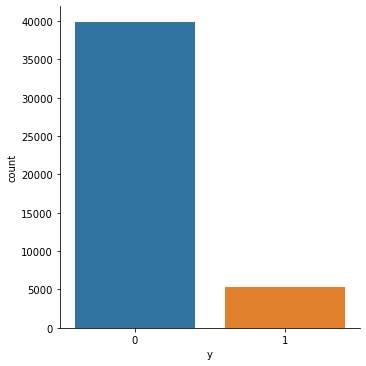

In [10]:
import seaborn as sb  # for plots

sb.catplot(x="y", kind='count', data=df)


<AxesSubplot:xlabel='y', ylabel='age'>

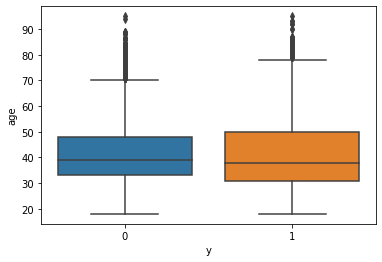

In [11]:
sb.boxplot(x='y', y='age', data=df)


<AxesSubplot:xlabel='y', ylabel='balance'>

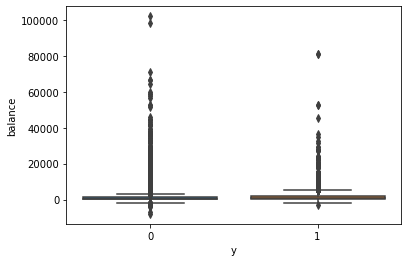

In [12]:
sb.boxplot(x='y', y='balance', data=df)


<AxesSubplot:xlabel='y', ylabel='duration'>

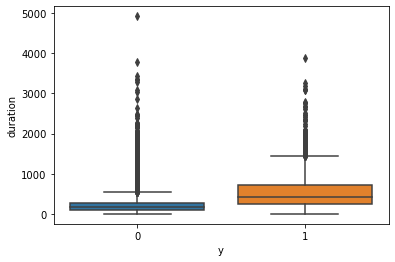

In [13]:
# boxplot with y on the x axis and duration on the y axis
sb.boxplot(x='y', y='duration', data=df)


<AxesSubplot:xlabel='y', ylabel='pdays'>

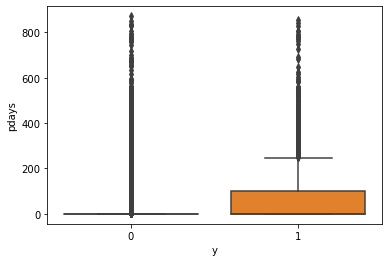

In [14]:
# boxplot with y on the x axis and pdays on the y axis
sb.boxplot(x='y', y='pdays', data=df)


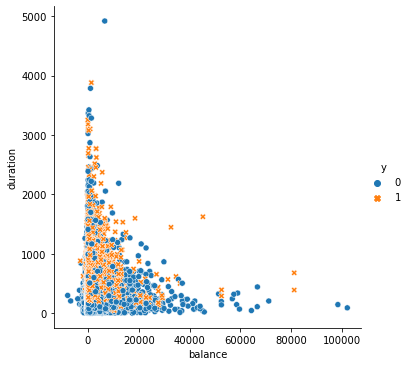

In [15]:
sb.relplot(x='balance', y='duration', data=df, hue=df.y, style=df.y)


**2. kNN**

In [16]:
# preprocess data
import numpy as np
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, df.columns != 'y'].values  # predictors
y = df.iloc[:, df.columns == 'y'].values  # target
y = y.ravel()  # convert target array to row vector of size (n, )
y = np.array(y).astype(int)

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))


In [17]:
# define the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('t', StandardScaler()),
                           ('m', KNeighborsClassifier())])


In [18]:
# evaluate the model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state=1234, shuffle=True)
n_scores = cross_val_score(
    pipeline, X, y, scoring='accuracy', cv=skf, n_jobs=-1, error_score='raise')


In [19]:
# report performance
from numpy import mean
from numpy import std

print("kNN Accuracy: %0.3f (+/- %0.3f)" % (mean(n_scores), std(n_scores) * 2))


kNN Accuracy: 0.892 (+/- 0.004)


In [20]:
# classification report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

y_pred = cross_val_predict(pipeline, X, y, cv=skf)

print(classification_report(y, y_pred, target_names=['0', '1']))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     39922
           1       0.57      0.31      0.41      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.64      0.67     45211
weighted avg       0.87      0.89      0.88     45211



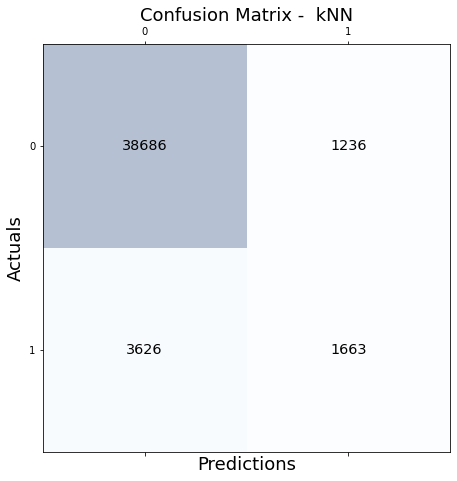

In [21]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j],
                va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix -  kNN', fontsize=18)
plt.show()


**3. Logistic Regression**

In [22]:
# divide into train and test sets
from sklearn.model_selection import train_test_split

# 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1234)


In [23]:
# perform Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear', random_state=1234)
clf.fit(X_train, y_train)


LogisticRegression(random_state=1234, solver='liblinear')

In [24]:
# report performance
print("Log. Regression Accuracy: %0.3f" % clf.score(X_test, y_test))


Log. Regression Accuracy: 0.903


In [25]:
# classification report
pred = clf.predict(X_test)

print(classification_report(y_test, pred, target_names=['0', '1']))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10000
           1       0.65      0.34      0.45      1303

    accuracy                           0.90     11303
   macro avg       0.78      0.66      0.70     11303
weighted avg       0.89      0.90      0.89     11303



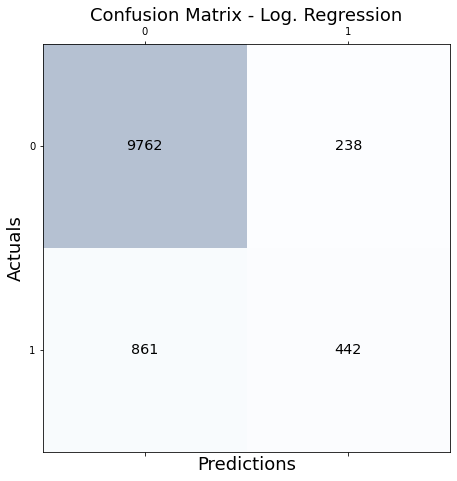

In [26]:
# confusion matrix
conf_mat = confusion_matrix(y_test, pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j],
                va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Log. Regression', fontsize=18)
plt.show()


**4. Naive Bayes**

In [27]:
# preprocess data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1234, stratify=y)


In [28]:
# perform Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)


In [29]:
# report performance
print("Naive Bayes Accuracy: %0.3f" % ((y_test == y_pred).sum() / y_pred.size))


Naive Bayes Accuracy: 0.988


In [30]:
# classification report
print(classification_report(y_test, y_pred, target_names=['0', '1']))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2063
           1       1.00      0.99      0.99      9240

    accuracy                           0.99     11303
   macro avg       0.97      0.99      0.98     11303
weighted avg       0.99      0.99      0.99     11303



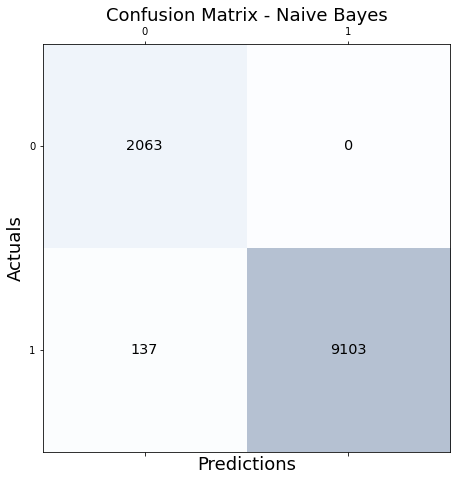

In [31]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j],
                va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Naive Bayes', fontsize=18)
plt.show()


**5. Random Forest**

In [32]:
# instantiate and fit the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1234)
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=1234)

In [33]:
# make predictions for the test set
y_pred_test = forest.predict(X_test)


In [34]:
# report performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Random Forest Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))


Random Forest Accuracy: 0.9997


In [35]:
# classification report
print(classification_report(y_test, y_pred_test, target_names=['0', '1']))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2063
           1       1.00      1.00      1.00      9240

    accuracy                           1.00     11303
   macro avg       1.00      1.00      1.00     11303
weighted avg       1.00      1.00      1.00     11303



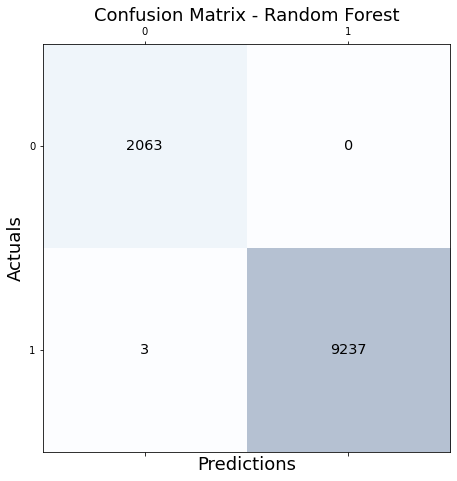

In [36]:
# View confusion matrix for test data and predictions
conf_mat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j],
                va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Random Forest', fontsize=18)
plt.show()


**6. Analysis**

Algorithms ranked by performance:

1. Random Forest:       100% accuracy

2. Naive Bayes:         98% 

3. Logistic Regression: 90% 

4. kNN:                 89% 

Random Forest and Naive Bayes achieved very similar accuracy. Naive Bayes was worse in precision for target 0 (91% vs 100% for Random Forest).

The two tree models may have outperformed Linear Regression for the following reasons: 

1. Linear separability: The data may not be linearly separable. Logistic Regression assumes that the data is linearly (or curvy linearly) separable in space. Trees are non-linear classifiers; they do not require data to be linearly separable. 

2. Skewness: The predictors `displacement`, `horsepower`, and `weight` are moderately/highly skewed. Trees handle skewed predictors nicely if allowed to grow fully. Logistic Regression does not handle skewed predictors well. 

3. Outliers: There may be some unhandled outliers influencing the Logistic Regression. Logistic Regression will push the decision boundary towards an outlier. Trees, at the initial stage, won't be affected by an outlier. However, if we let them grow fully, the signal will mote to one side (+ve or -ve), while the outlier will be moved to the other (there will be one leaf for each outlier). 

Even with proper scaling provided for fair treatment among features, kNN performed worst of the four.

This script was able to learn that the outcome of a bank’s marketing campaigns can be accurately predicted given
data on past results. This analyses may be useful to businesses wanting to improve their marketing results. By
tailoring their marketing strategy based on past results, businesses can accurately target those with a higher
likelihood of success.

**R versus Python**

I prefer machine learning in R vs. Python by a slim margin. This is mostly due to RStudio. RStudio is the best IDE I have used, and really shines in its ease-of-use. I had some frustration in getting Python for ML working on my PC. I did not have that problem with R.

Python does have a leg up over R in the packages available for ML (e.g. NumPy, pandas, scikit-learn). Python seems to have more community support and is more widely used in industry. This makes learning and troubleshooting easier in Python for me, as there are more online resources available.